<a href="https://colab.research.google.com/github/DeepakRagupathy/Stock/blob/main/Stock__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import os
from prophet import Prophet
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
def data_collection(foldername,column_name):
  folder_path = '/content/drive/MyDrive/metrics_data/'  + foldername
  df_list = {}

  for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df_list["Date"]=df["Date"].values
        df_list[filename.replace(".csv","")]=df[column_name].values



  return pd.DataFrame(df_list)

In [6]:
df1=data_collection("Return_metrics",column_name="Aditya Birla SL Flexi Cap Fund(G)")
df2=data_collection("Risk_adjusted_return_metrics",column_name="Aditya Birla SL Flexi Cap Fund(G)")
df3=data_collection("Risk_metrics",column_name="Aditya Birla SL Flexi Cap Fund(G)")

In [7]:
# Merge DataFrames on 'Date'
final_df = pd.merge(df1, df2, on='Date', how='outer')
final_df = pd.merge(final_df, df3, on='Date', how='outer')

# Save to CSV
final_df.to_csv('combined_two_columns_horizontal.csv', index=False)

print("Saved combined data to 'combined_two_columns_horizontal.csv'")


Saved combined data to 'combined_two_columns_horizontal.csv'


In [8]:
data=pd.read_csv('/content/combined_two_columns_horizontal.csv')
data

,Date,Benchmark_Return_36m,CAGR_Return_12m,CAGR_Return_60m,Rolling_Average_Return_60m,CAGR_Return_36m,Benchmark_Return_60m,Rolling_Average_Return_12m,Benchmark_Return_12m,Rolling_Average_Return_36m,...,Maximum_Drawdown_60m,Average_Drawdown_36m,Beta_12m,Average_Drawdown_12m,Downside_Capture_36m,Average_Drawdown_60m,Downside_Capture_60m,Downside_Capture_12m,Beta_60m,Beta_36m
0,2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2024-10-31,0.138448,0.379160,0.186560,0.195508,0.138448,0.186560,0.337364,0.379160,0.177302,...,-0.307307,-0.062837,0.952605,-0.058911,1.077072,-0.093244,1.042767,0.927427,1.013455,0.976842
178,2024-11-30,0.152963,0.286926,0.178354,0.198926,0.152963,0.178354,0.350314,0.286926,0.175389,...,-0.307307,-0.063589,0.971868,-0.062668,1.047792,-0.093781,1.042767,0.927427,1.014129,0.967847
179,2024-12-31,0.138644,0.185206,0.174224,0.200590,0.138644,0.174224,0.344119,0.185206,0.172124,...,-0.307307,-0.058491,1.001823,-0.073013,1.039148,-0.095259,1.038526,0.906337,1.013544,0.965555
180,2025-01-31,0.132125,0.123053,0.161082,0.200405,0.132125,0.161082,0.328056,0.123053,0.167213,...,-0.269433,-0.069819,1.016982,-0.107102,1.003926,-0.094718,1.064831,0.953915,1.015578,0.963268


In [9]:
data["Date"]

,Date
0,2010-01-31
1,2010-02-28
2,2010-03-31
3,2010-04-30
4,2010-05-31
...,...
177,2024-10-31
178,2024-11-30
179,2024-12-31
180,2025-01-31


In [10]:
column_12m = data[[col for col in data.columns if "12m" in col]]
column_12m

,CAGR_Return_12m,Rolling_Average_Return_12m,Benchmark_Return_12m,Sharpe_Ratio_12m,Sortino_Ratio_12m,M_Squared_12m,Jensens_Alpha_12m,Treyners_Ratio_12m,Information_Ratio_12m,Omega_Ratio_12m,Efficiency_Ratio_12m,Rolling_Alpha_12m,Standard_Deviation_12m,VaR_12m,Downside_Deviation_12m,Maximum_Drawdown_12m,Beta_12m,Average_Drawdown_12m,Downside_Capture_12m
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.379160,0.337364,0.379160,2.390592,5.481245,0.027324,0.029723,2.304825,0.756232,1.096845,0.687098,-0.018132,0.129324,-0.212737,0.056403,-0.058911,0.952605,-0.058911,0.927427
178,0.286926,0.350314,0.286926,1.733934,3.860939,0.017190,0.019698,1.708715,0.665830,1.099905,0.625100,-0.016397,0.125106,-0.205800,0.056185,-0.062668,0.971868,-0.062668,0.927427
179,0.185206,0.344119,0.185206,1.001784,2.051794,0.020921,0.022629,1.018375,1.168303,1.162673,0.497988,-0.013696,0.115001,-0.189176,0.056149,-0.073013,1.001823,-0.073013,0.906337
180,0.123053,0.328056,0.123053,0.421259,0.845303,0.020957,0.021933,0.433473,1.163338,1.124302,0.313535,-0.009966,0.125940,-0.207172,0.062763,-0.107102,1.016982,-0.107102,0.953915


In [11]:
df = pd.merge(data[['Date']],column_12m, left_index=True, right_index=True)
df

,Date,CAGR_Return_12m,Rolling_Average_Return_12m,Benchmark_Return_12m,Sharpe_Ratio_12m,Sortino_Ratio_12m,M_Squared_12m,Jensens_Alpha_12m,Treyners_Ratio_12m,Information_Ratio_12m,Omega_Ratio_12m,Efficiency_Ratio_12m,Rolling_Alpha_12m,Standard_Deviation_12m,VaR_12m,Downside_Deviation_12m,Maximum_Drawdown_12m,Beta_12m,Average_Drawdown_12m,Downside_Capture_12m
0,2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2024-10-31,0.379160,0.337364,0.379160,2.390592,5.481245,0.027324,0.029723,2.304825,0.756232,1.096845,0.687098,-0.018132,0.129324,-0.212737,0.056403,-0.058911,0.952605,-0.058911,0.927427
178,2024-11-30,0.286926,0.350314,0.286926,1.733934,3.860939,0.017190,0.019698,1.708715,0.665830,1.099905,0.625100,-0.016397,0.125106,-0.205800,0.056185,-0.062668,0.971868,-0.062668,0.927427
179,2024-12-31,0.185206,0.344119,0.185206,1.001784,2.051794,0.020921,0.022629,1.018375,1.168303,1.162673,0.497988,-0.013696,0.115001,-0.189176,0.056149,-0.073013,1.001823,-0.073013,0.906337
180,2025-01-31,0.123053,0.328056,0.123053,0.421259,0.845303,0.020957,0.021933,0.433473,1.163338,1.124302,0.313535,-0.009966,0.125940,-0.207172,0.062763,-0.107102,1.016982,-0.107102,0.953915


In [12]:
df.to_csv("12m.csv")

In [13]:
df.dropna()

,Date,CAGR_Return_12m,Rolling_Average_Return_12m,Benchmark_Return_12m,Sharpe_Ratio_12m,Sortino_Ratio_12m,M_Squared_12m,Jensens_Alpha_12m,Treyners_Ratio_12m,Information_Ratio_12m,Omega_Ratio_12m,Efficiency_Ratio_12m,Rolling_Alpha_12m,Standard_Deviation_12m,VaR_12m,Downside_Deviation_12m,Maximum_Drawdown_12m,Beta_12m,Average_Drawdown_12m,Downside_Capture_12m
23,2011-12-31,-0.293776,-0.086966,-0.293776,-1.818931,-2.630082,-0.039379,-0.043698,-1.772329,-0.804928,0.802026,0.566242,-0.044497,0.199995,-0.328991,0.138314,-0.221878,0.958426,-0.142841,1.029569
24,2012-01-31,-0.114474,-0.101875,-0.114474,-0.804621,-1.499002,-0.056110,-0.055305,-0.769643,-1.239834,0.828559,0.205239,-0.047577,0.229269,-0.377147,0.123065,-0.221878,0.944577,-0.221878,1.034578
25,2012-02-29,-0.014859,-0.104446,-0.014859,-0.376302,-0.704433,-0.038859,-0.036679,-0.351778,-1.023474,0.896341,0.026212,-0.048402,0.225508,-0.370961,0.120464,-0.221878,0.928050,-0.221878,0.958693
26,2012-03-31,-0.090364,-0.114332,-0.090364,-0.768976,-1.338215,-0.023258,-0.023185,-0.722193,-0.391693,0.914183,0.198748,-0.044869,0.208542,-0.343052,0.119834,-0.221878,0.930064,-0.221878,0.932489
27,2012-04-30,-0.102113,-0.123252,-0.102113,-0.826548,-1.454447,-0.028643,-0.028155,-0.774968,-0.538277,0.897681,0.223798,-0.041107,0.208232,-0.342541,0.118336,-0.198620,0.929208,-0.198620,0.949630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2024-10-31,0.379160,0.337364,0.379160,2.390592,5.481245,0.027324,0.029723,2.304825,0.756232,1.096845,0.687098,-0.018132,0.129324,-0.212737,0.056403,-0.058911,0.952605,-0.058911,0.927427
178,2024-11-30,0.286926,0.350314,0.286926,1.733934,3.860939,0.017190,0.019698,1.708715,0.665830,1.099905,0.625100,-0.016397,0.125106,-0.205800,0.056185,-0.062668,0.971868,-0.062668,0.927427
179,2024-12-31,0.185206,0.344119,0.185206,1.001784,2.051794,0.020921,0.022629,1.018375,1.168303,1.162673,0.497988,-0.013696,0.115001,-0.189176,0.056149,-0.073013,1.001823,-0.073013,0.906337
180,2025-01-31,0.123053,0.328056,0.123053,0.421259,0.845303,0.020957,0.021933,0.433473,1.163338,1.124302,0.313535,-0.009966,0.125940,-0.207172,0.062763,-0.107102,1.016982,-0.107102,0.953915


In [14]:
df

,Date,CAGR_Return_12m,Rolling_Average_Return_12m,Benchmark_Return_12m,Sharpe_Ratio_12m,Sortino_Ratio_12m,M_Squared_12m,Jensens_Alpha_12m,Treyners_Ratio_12m,Information_Ratio_12m,Omega_Ratio_12m,Efficiency_Ratio_12m,Rolling_Alpha_12m,Standard_Deviation_12m,VaR_12m,Downside_Deviation_12m,Maximum_Drawdown_12m,Beta_12m,Average_Drawdown_12m,Downside_Capture_12m
0,2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2024-10-31,0.379160,0.337364,0.379160,2.390592,5.481245,0.027324,0.029723,2.304825,0.756232,1.096845,0.687098,-0.018132,0.129324,-0.212737,0.056403,-0.058911,0.952605,-0.058911,0.927427
178,2024-11-30,0.286926,0.350314,0.286926,1.733934,3.860939,0.017190,0.019698,1.708715,0.665830,1.099905,0.625100,-0.016397,0.125106,-0.205800,0.056185,-0.062668,0.971868,-0.062668,0.927427
179,2024-12-31,0.185206,0.344119,0.185206,1.001784,2.051794,0.020921,0.022629,1.018375,1.168303,1.162673,0.497988,-0.013696,0.115001,-0.189176,0.056149,-0.073013,1.001823,-0.073013,0.906337
180,2025-01-31,0.123053,0.328056,0.123053,0.421259,0.845303,0.020957,0.021933,0.433473,1.163338,1.124302,0.313535,-0.009966,0.125940,-0.207172,0.062763,-0.107102,1.016982,-0.107102,0.953915


In [15]:
df.to_csv("Features.csv")

In [16]:
df.shape

(182, 20)

In [17]:
df.size

3640

In [18]:
df.describe()

,CAGR_Return_12m,Rolling_Average_Return_12m,Benchmark_Return_12m,Sharpe_Ratio_12m,Sortino_Ratio_12m,M_Squared_12m,Jensens_Alpha_12m,Treyners_Ratio_12m,Information_Ratio_12m,Omega_Ratio_12m,Efficiency_Ratio_12m,Rolling_Alpha_12m,Standard_Deviation_12m,VaR_12m,Downside_Deviation_12m,Maximum_Drawdown_12m,Beta_12m,Average_Drawdown_12m,Downside_Capture_12m
count,170.000000,159.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,171.000000,170.000000,159.000000,170.000000,170.000000,170.000000,170.000000,170.000000,169.000000,171.000000
mean,0.158517,0.161462,0.158517,0.707978,8.139210,0.006716,0.012357,0.739246,0.096864,2.902137,0.382193,0.013525,0.165076,-0.271550,0.078997,-0.106377,0.978526,-0.085714,0.937761
std,0.224501,0.178904,0.224501,1.462771,41.796891,0.049427,0.056578,1.533893,1.410674,15.695224,0.294799,0.058043,0.061805,0.101669,0.057403,0.076367,0.088563,0.073491,0.253643
min,-0.293776,-0.142579,-0.293776,-1.818931,-2.630082,-0.087913,-0.093051,-1.843461,-2.531110,0.541131,0.002401,-0.052085,0.064821,-0.616187,0.001659,-0.307307,0.680851,-0.307307,0.008350
25%,0.005063,0.023898,0.005063,-0.340824,-0.710259,-0.027624,-0.026015,-0.348109,-0.866555,0.866382,0.120934,-0.020697,0.122864,-0.310958,0.043810,-0.140749,0.931710,-0.133041,0.846265
50%,0.096994,0.121551,0.096994,0.219839,0.494867,-0.001808,0.003592,0.210078,-0.220983,1.006908,0.300782,-0.006506,0.155465,-0.255740,0.062935,-0.080551,0.971496,-0.064205,0.963203
75%,0.267008,0.276138,0.267008,1.704531,4.383072,0.036340,0.038762,1.704221,0.908669,1.202436,0.623040,0.042354,0.189032,-0.202110,0.095481,-0.051006,1.017765,-0.031027,1.049359
max,0.754734,0.614615,0.754734,4.483901,393.810658,0.187738,0.226579,5.319182,4.753369,146.921656,0.992307,0.194426,0.374582,-0.106630,0.256729,0.000000,1.254875,-0.000957,1.852057


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        182 non-null    object 
 1   CAGR_Return_12m             170 non-null    float64
 2   Rolling_Average_Return_12m  159 non-null    float64
 3   Benchmark_Return_12m        170 non-null    float64
 4   Sharpe_Ratio_12m            170 non-null    float64
 5   Sortino_Ratio_12m           170 non-null    float64
 6   M_Squared_12m               170 non-null    float64
 7   Jensens_Alpha_12m           170 non-null    float64
 8   Treyners_Ratio_12m          170 non-null    float64
 9   Information_Ratio_12m       170 non-null    float64
 10  Omega_Ratio_12m             171 non-null    float64
 11  Efficiency_Ratio_12m        170 non-null    float64
 12  Rolling_Alpha_12m           159 non-null    float64
 13  Standard_Deviation_12m      170 non

In [20]:
df.head()

,Date,CAGR_Return_12m,Rolling_Average_Return_12m,Benchmark_Return_12m,Sharpe_Ratio_12m,Sortino_Ratio_12m,M_Squared_12m,Jensens_Alpha_12m,Treyners_Ratio_12m,Information_Ratio_12m,Omega_Ratio_12m,Efficiency_Ratio_12m,Rolling_Alpha_12m,Standard_Deviation_12m,VaR_12m,Downside_Deviation_12m,Maximum_Drawdown_12m,Beta_12m,Average_Drawdown_12m,Downside_Capture_12m
0,2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.columns

Index(['Date', 'CAGR_Return_12m', 'Rolling_Average_Return_12m',
       'Benchmark_Return_12m', 'Sharpe_Ratio_12m', 'Sortino_Ratio_12m',
       'M_Squared_12m', 'Jensens_Alpha_12m', 'Treyners_Ratio_12m',
       'Information_Ratio_12m', 'Omega_Ratio_12m', 'Efficiency_Ratio_12m',
       'Rolling_Alpha_12m', 'Standard_Deviation_12m', 'VaR_12m',
       'Downside_Deviation_12m', 'Maximum_Drawdown_12m', 'Beta_12m',
       'Average_Drawdown_12m', 'Downside_Capture_12m'],
      dtype='object')

In [22]:
df.iloc[:,[0,2]]

,Date,Rolling_Average_Return_12m
0,2010-01-31,NaN
1,2010-02-28,NaN
2,2010-03-31,NaN
3,2010-04-30,NaN
4,2010-05-31,NaN
...,...,...
177,2024-10-31,0.337364
178,2024-11-30,0.350314
179,2024-12-31,0.344119
180,2025-01-31,0.328056


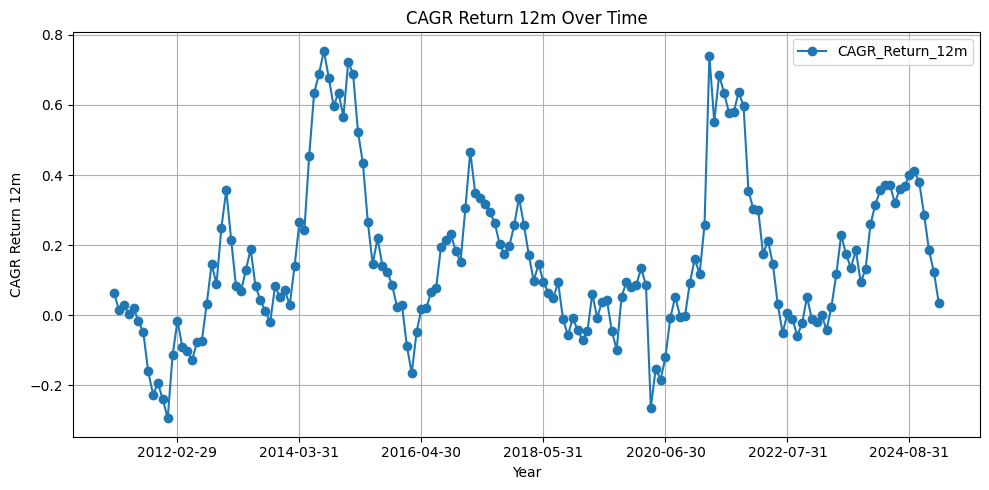

In [23]:
# Plot directly using the first two columns
df.iloc[:, 0:2].plot(x=0, y=1, kind='line', marker='o', figsize=(10, 5), title='CAGR Return 12m Over Time')

# Customize the axes
plt.xlabel('Year')
plt.ylabel('CAGR Return 12m')
plt.grid(True)
plt.tight_layout()
plt.show()


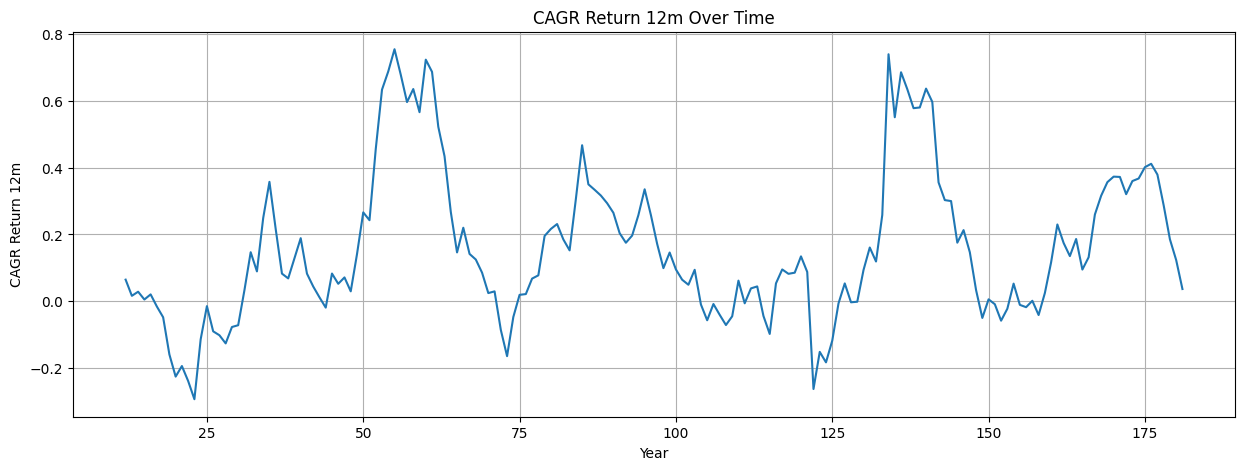

In [24]:
plt.figure(figsize=(15,5))
plt.plot(df['CAGR_Return_12m']) # Changed column name to 'CAGR_Return_12m'
plt.title('CAGR Return 12m Over Time')
plt.xlabel('Year')
plt.ylabel('CAGR Return 12m')
plt.grid(True)
plt.show()

In [25]:
df.duplicated().any()

np.False_

In [61]:
df

,Date,CAGR_Return_12m
0,2010-01-31,NaN
1,2010-02-28,NaN
2,2010-03-31,NaN
3,2010-04-30,NaN
4,2010-05-31,NaN
...,...,...
177,2024-10-31,0.379160
178,2024-11-30,0.286926
179,2024-12-31,0.185206
180,2025-01-31,0.123053


In [62]:
target=df["CAGR_Return_12m"]
features=df.drop("CAGR_Return_12m",axis=1)

In [72]:
from sklearn.impute import SimpleImputer

In [73]:
sim=SimpleImputer(strategy="mean")

In [ ]:
sim.fit_transform()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [69]:
X_train

,Date
65,2015-06-30
67,2015-08-31
31,2012-08-31
12,2011-01-31
41,2013-06-30
...,...
106,2018-11-30
14,2011-03-31
92,2017-09-30
179,2024-12-31


### LinearRegression

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = model.predict(X_test)

UFuncTypeError: ufunc 'matmul' did not contain a loop with signature matching types (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>) -> None

In [58]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [59]:
# Make a prediction for future data (Example: using the last row in the dataset)
future_data = features.iloc[-1, :].values.reshape(1, -1)  # Assuming you want to predict using the last row
future_stock_value = model.predict(future_data)

print("Predicted future stock value:", future_stock_value)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [ ]:
future_data = features.iloc[-1, :].values.reshape(1, -1)
future_stock_value = model.predict(future_data)[0]

print("Predicted future stock value:", future_stock_value)

# Plot historical data and predicted value
years = data['Date'].tolist()  # Assuming 'Date' is your x-axis
values = target.tolist()

# Add the predicted value for 2026
years.append('2026')
values.append(future_stock_value)

# Plot the graph
plt.plot(years, values, marker='o')
plt.title('CAGR Return 12m with 2026 Prediction')
plt.xlabel('Year')
plt.ylabel('CAGR Return 12m')
plt.yticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.plot(years, values, marker='o', label='Past Data')
plt.plot('2026', future_stock_value, 'ro', label='Predicted 2026')
plt.title('CAGR Return 12m - Line Chart with 2026 Prediction')
plt.xlabel('Year')
plt.ylabel('CAGR Return 12m')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
plt.bar(years[:-1], values[:-1], label='Past Data')  # Exclude prediction for now
plt.bar('2026', future_stock_value, color='red', label='Predicted 2026')  # Prediction in red
plt.title('CAGR Return 12m - Bar Chart with 2026 Prediction')
plt.xlabel('Year')
plt.ylabel('CAGR Return 12m')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
plt.plot(years, values, linestyle='-', marker='o', color='blue', label='Trend')
plt.scatter('2026', future_stock_value, color='red', s=100, label='2026 Prediction')
plt.title('CAGR Return 12m - Trend with Future Highlight')
plt.xlabel('Year')
plt.ylabel('CAGR Return 12m')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Using Other Models

In [ ]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)


In [ ]:
# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

In [ ]:

# Support Vector Regressor
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [ ]:
# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred))

In [ ]:
# Evaluate each model
evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("KNN", y_test, knn_preds)
evaluate_model("SVM", y_test, svm_preds)

## Time Series Model - Prophet

In [30]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [31]:
# Step 1: Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [32]:
# Step 2: Rename columns to fit Prophet's format
df_prophet = df.rename(columns={'Date': 'ds', 'CAGR_Return_12m': 'y'})

In [33]:
# Step 3: Initialize and train the Prophet model
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnwfpj481/fldw1izg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnwfpj481/upt7khko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48197', 'data', 'file=/tmp/tmpnwfpj481/fldw1izg.json', 'init=/tmp/tmpnwfpj481/upt7khko.json', 'output', 'file=/tmp/tmpnwfpj481/prophet_model6fcdwzku/prophet_model-20250506115536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:55:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:55:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [34]:
# Step 4: Create future dataframe to include the year 2026
future = model.make_future_dataframe(periods=366)  # 2026 is a leap year
forecast = model.predict(future)

In [35]:
# Step 5: Filter forecast for 2026
forecast_2026 = forecast[(forecast['ds'] >= '2025-02-01') & (forecast['ds'] <= '2026-12-31')]

In [36]:
# Display the forecast for 2026
print(forecast_2026[['ds', 'yhat']])

            ds      yhat
181 2025-02-28  0.188766
182 2025-03-01  0.186869
183 2025-03-02  0.185136
184 2025-03-03  0.183601
185 2025-03-04  0.182295
..         ...       ...
543 2026-02-25  0.200650
544 2026-02-26  0.198500
545 2026-02-27  0.196379
546 2026-02-28  0.194333
547 2026-03-01  0.192401

[367 rows x 2 columns]


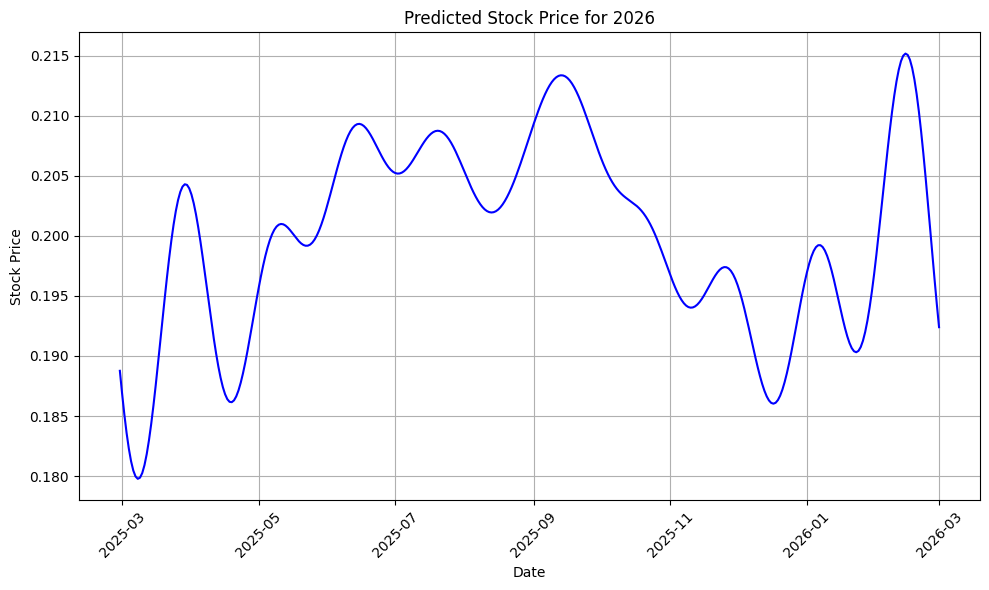

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(forecast_2026['ds'], forecast_2026['yhat'], label='Predicted Stock Price', color='blue')
plt.title('Predicted Stock Price for 2026')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In [38]:
data["Date"]

,Date
0,2010-01-31
1,2010-02-28
2,2010-03-31
3,2010-04-30
4,2010-05-31
...,...
177,2024-10-31
178,2024-11-30
179,2024-12-31
180,2025-01-31


# Using LSTM

In [40]:
d=pd.read_csv('12m.csv',index_col=0)
d

,Date,CAGR_Return_12m,Rolling_Average_Return_12m,Benchmark_Return_12m,Sharpe_Ratio_12m,Sortino_Ratio_12m,M_Squared_12m,Jensens_Alpha_12m,Treyners_Ratio_12m,Information_Ratio_12m,Omega_Ratio_12m,Efficiency_Ratio_12m,Rolling_Alpha_12m,Standard_Deviation_12m,VaR_12m,Downside_Deviation_12m,Maximum_Drawdown_12m,Beta_12m,Average_Drawdown_12m,Downside_Capture_12m
0,2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2024-10-31,0.379160,0.337364,0.379160,2.390592,5.481245,0.027324,0.029723,2.304825,0.756232,1.096845,0.687098,-0.018132,0.129324,-0.212737,0.056403,-0.058911,0.952605,-0.058911,0.927427
178,2024-11-30,0.286926,0.350314,0.286926,1.733934,3.860939,0.017190,0.019698,1.708715,0.665830,1.099905,0.625100,-0.016397,0.125106,-0.205800,0.056185,-0.062668,0.971868,-0.062668,0.927427
179,2024-12-31,0.185206,0.344119,0.185206,1.001784,2.051794,0.020921,0.022629,1.018375,1.168303,1.162673,0.497988,-0.013696,0.115001,-0.189176,0.056149,-0.073013,1.001823,-0.073013,0.906337
180,2025-01-31,0.123053,0.328056,0.123053,0.421259,0.845303,0.020957,0.021933,0.433473,1.163338,1.124302,0.313535,-0.009966,0.125940,-0.207172,0.062763,-0.107102,1.016982,-0.107102,0.953915


In [41]:
df

,Unnamed: 0,Date,CAGR_Return_12m,Rolling_Average_Return_12m,Benchmark_Return_12m,Sharpe_Ratio_12m,Sortino_Ratio_12m,M_Squared_12m,Jensens_Alpha_12m,Treyners_Ratio_12m,...,Omega_Ratio_12m,Efficiency_Ratio_12m,Rolling_Alpha_12m,Standard_Deviation_12m,VaR_12m,Downside_Deviation_12m,Maximum_Drawdown_12m,Beta_12m,Average_Drawdown_12m,Downside_Capture_12m
0,0,2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,177,2024-10-31,0.379160,0.337364,0.379160,2.390592,5.481245,0.027324,0.029723,2.304825,...,1.096845,0.687098,-0.018132,0.129324,-0.212737,0.056403,-0.058911,0.952605,-0.058911,0.927427
178,178,2024-11-30,0.286926,0.350314,0.286926,1.733934,3.860939,0.017190,0.019698,1.708715,...,1.099905,0.625100,-0.016397,0.125106,-0.205800,0.056185,-0.062668,0.971868,-0.062668,0.927427
179,179,2024-12-31,0.185206,0.344119,0.185206,1.001784,2.051794,0.020921,0.022629,1.018375,...,1.162673,0.497988,-0.013696,0.115001,-0.189176,0.056149,-0.073013,1.001823,-0.073013,0.906337
180,180,2025-01-31,0.123053,0.328056,0.123053,0.421259,0.845303,0.020957,0.021933,0.433473,...,1.124302,0.313535,-0.009966,0.125940,-0.207172,0.062763,-0.107102,1.016982,-0.107102,0.953915


In [42]:
df=df.iloc[:,1:]
df

,Date,CAGR_Return_12m,Rolling_Average_Return_12m,Benchmark_Return_12m,Sharpe_Ratio_12m,Sortino_Ratio_12m,M_Squared_12m,Jensens_Alpha_12m,Treyners_Ratio_12m,Information_Ratio_12m,Omega_Ratio_12m,Efficiency_Ratio_12m,Rolling_Alpha_12m,Standard_Deviation_12m,VaR_12m,Downside_Deviation_12m,Maximum_Drawdown_12m,Beta_12m,Average_Drawdown_12m,Downside_Capture_12m
0,2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2024-10-31,0.379160,0.337364,0.379160,2.390592,5.481245,0.027324,0.029723,2.304825,0.756232,1.096845,0.687098,-0.018132,0.129324,-0.212737,0.056403,-0.058911,0.952605,-0.058911,0.927427
178,2024-11-30,0.286926,0.350314,0.286926,1.733934,3.860939,0.017190,0.019698,1.708715,0.665830,1.099905,0.625100,-0.016397,0.125106,-0.205800,0.056185,-0.062668,0.971868,-0.062668,0.927427
179,2024-12-31,0.185206,0.344119,0.185206,1.001784,2.051794,0.020921,0.022629,1.018375,1.168303,1.162673,0.497988,-0.013696,0.115001,-0.189176,0.056149,-0.073013,1.001823,-0.073013,0.906337
180,2025-01-31,0.123053,0.328056,0.123053,0.421259,0.845303,0.020957,0.021933,0.433473,1.163338,1.124302,0.313535,-0.009966,0.125940,-0.207172,0.062763,-0.107102,1.016982,-0.107102,0.953915


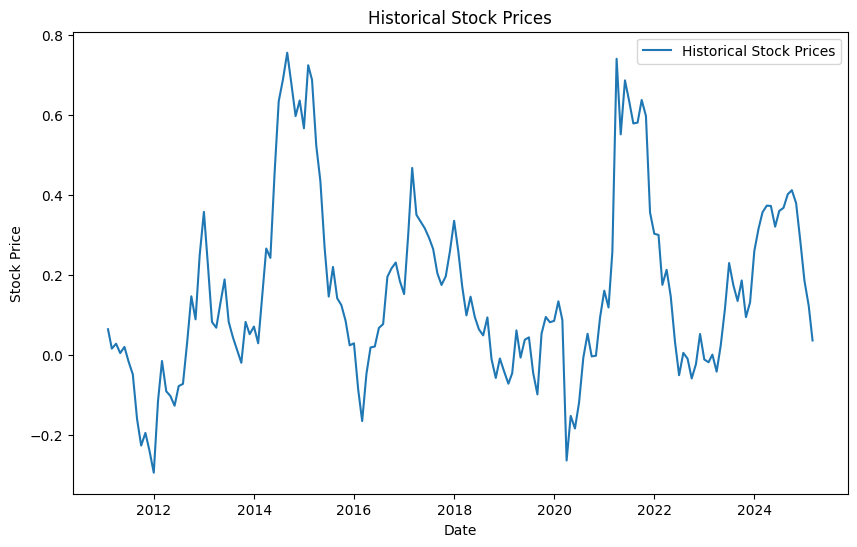

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'df' is already loaded from '12m.csv'
# and 'Date' column is already converted to datetime

# Remove trailing tab from column name
df.columns = df.columns.str.strip()

# Plotting the historical stock prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['CAGR_Return_12m'], label='Historical Stock Prices')  # Using the corrected column name
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [46]:
# Normalize the stock prices to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['CAGR_Return_12m'].values.reshape(-1, 1))

# Create a dataset with 60 previous days' stock prices as features
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Previous 60 days
        y.append(data[i + time_step, 0])  # Next day's stock price
    return np.array(X), np.array(y)

# Prepare the data
time_step = 60  # Using the last 60 days to predict the next day
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be 3D for LSTM input (samples, time_step, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [50]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: nan
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: nan
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: nan
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━

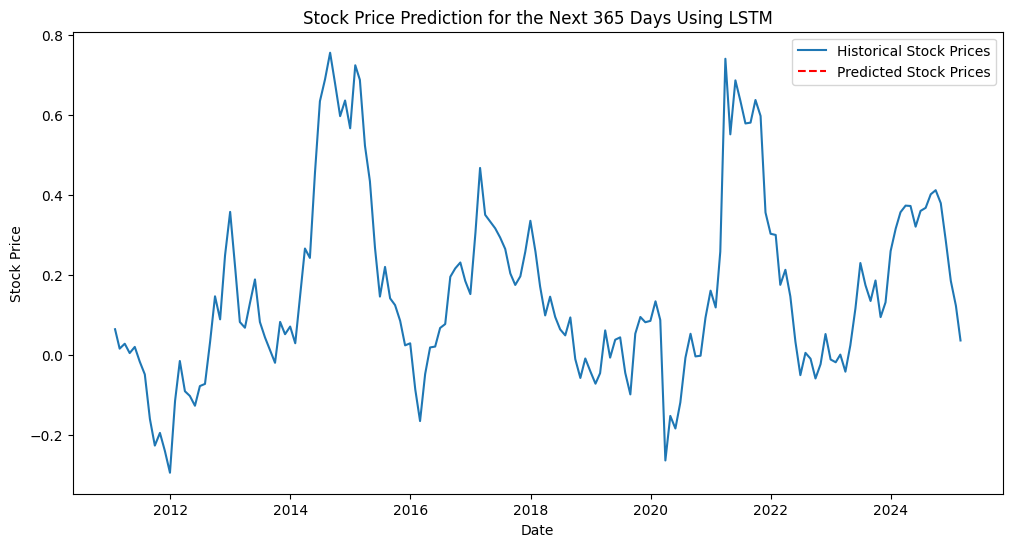

In [51]:
# Make predictions for the next 365 days
predicted_prices = []

# Get the last 60 days of stock prices from the training data
last_60_days = scaled_data[-time_step:]

# Predict the next 365 days
for _ in range(365):
    # Reshape the last 60 days data to be compatible with the LSTM model
    last_60_days = last_60_days.reshape(1, time_step, 1)

    # Predict the next day's stock price
    next_day_prediction = model.predict(last_60_days)

    # Append the prediction to the list
    predicted_prices.append(next_day_prediction[0, 0])

    # Update the input sequence by appending the prediction and removing the first value
    last_60_days = np.append(last_60_days[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)

# Reverse the scaling to get actual stock prices
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Generate a future date range for the predictions
last_date = df['Date'].iloc[-1]
future_dates = pd.date_range(last_date, periods=366, freq='D')[1:]

# Create a DataFrame with predicted stock prices
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': predicted_prices.flatten()})

# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['CAGR_Return_12m'], label='Historical Stock Prices')
plt.plot(forecast_df['Date'], forecast_df['Predicted Close'], label='Predicted Stock Prices', color='red', linestyle='--')
plt.title('Stock Price Prediction for the Next 365 Days Using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
